In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier


In [2]:
income=pd.DataFrame(pd.read_csv('income.csv'))
income

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0
48838,64,321403,9,0,0,40,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [8]:
X_train,X_test,y_train,y_test=train_test_split(income.drop('income_level',axis=1),income['income_level'],test_size=0.2,random_state=42)
classifier=AdaBoostClassifier(n_estimators=10,random_state=42)
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8168696898351929


In [7]:
max_i,max_accuracy=0,0

for i in range(1,101):
  classifier=AdaBoostClassifier(n_estimators=i,random_state=42)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(i,accuracy)
  if accuracy>max_accuracy:
    max_accuracy=accuracy
    max_i=i
print(max_i,max_accuracy)

1 0.8021291841539564
2 0.8021291841539564
3 0.8021291841539564
4 0.8100112601085065
5 0.8100112601085065
6 0.8197358992732112
7 0.8219879209745112
8 0.8261848705087522
9 0.8219879209745112
10 0.8182004299314157
11 0.8275156106049749
12 0.8221926502200839
13 0.8291534445695568
14 0.8239328488074521
15 0.8291534445695568
16 0.8239328488074521
17 0.8296652676834886
18 0.8242399426758112
19 0.8296652676834886
20 0.8244446719213839
21 0.8295629030607022
22 0.8244446719213839
23 0.8296652676834886
24 0.8244446719213839
25 0.8296652676834886
26 0.8246494011669567
27 0.8296652676834886
28 0.8246494011669567
29 0.8247517657897431
30 0.8309960077797113
31 0.8263895997543249
32 0.8312007370252841
33 0.8318149247620023
34 0.8261848705087522
35 0.8309960077797113
36 0.8262872351315386
37 0.8314054662708568
38 0.8314054662708568
39 0.8309960077797113
40 0.8314054662708568
41 0.8314054662708568
42 0.8314054662708568
43 0.8317125601392159
44 0.8322243832531477
45 0.8323267478759341
46 0.83273620636707

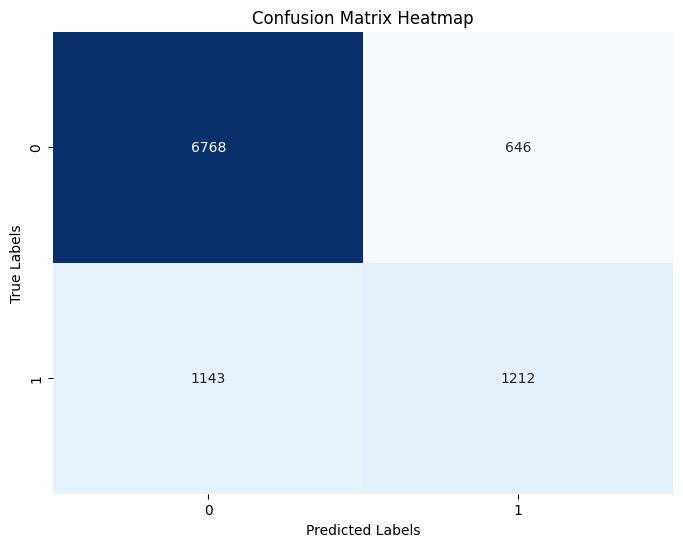

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()